In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.integrate as integrate
from matplotlib.patches import Rectangle
import scipy.special as sp
import matplotlib.patches as patches
import seaborn as sns

%matplotlib inline

In [4]:
teta = 10
uniform_rv = sts.uniform(loc=0, scale=teta)

arr = np.array([2, 5, 10, 20, 50, 100, 500])

# 1) Построить гистограммы (смоделировав по 1000 реализаций) для $X_{(n)}$ при и сравнить с нормальной плотностью.

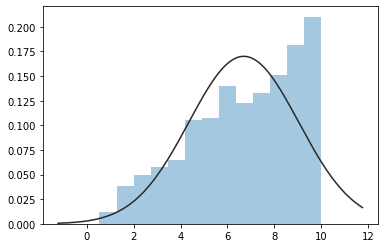

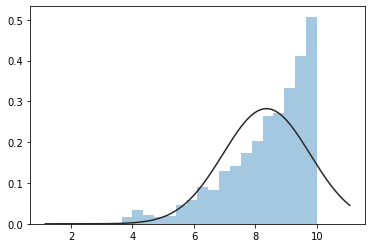

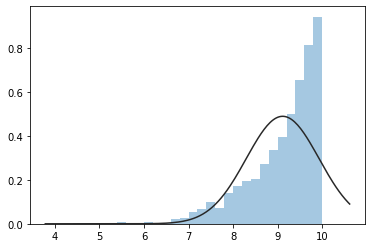

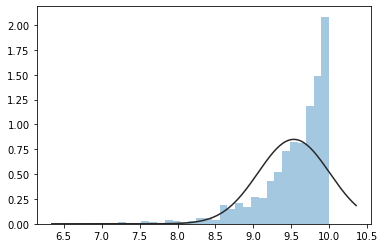

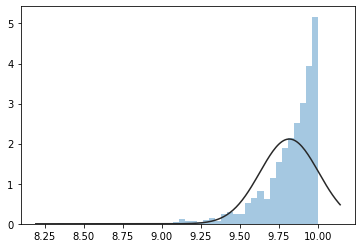

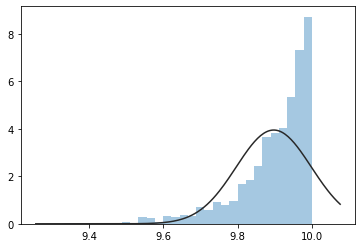

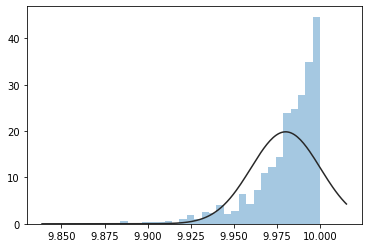

In [3]:
for n in arr:
    sample = np.zeros(1000)
    for i in range(1000):
        sample[i] = np.max(uniform_rv.rvs(n))
    sns.distplot(sample, kde=False, fit=sts.norm)
    plt.show()

# 2) Построить гистограммы (смоделировав по 1000 реализаций) для 2$\overline{X}$ изобразить на гистограмме нормальную плотность.


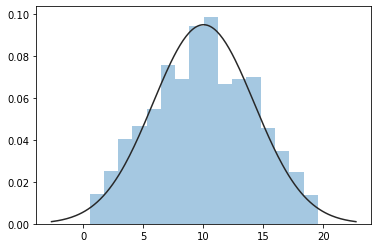

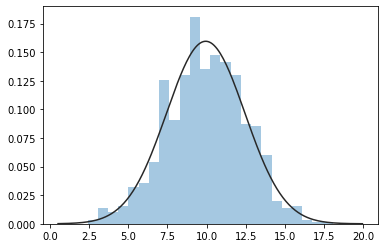

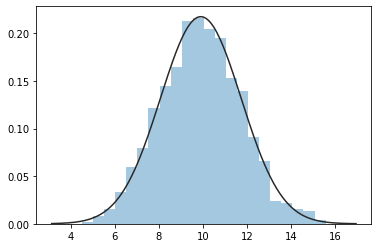

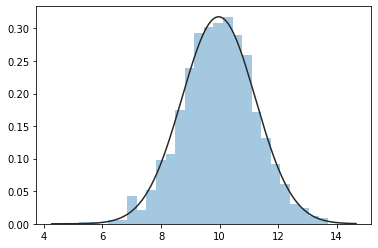

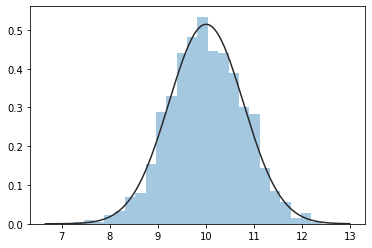

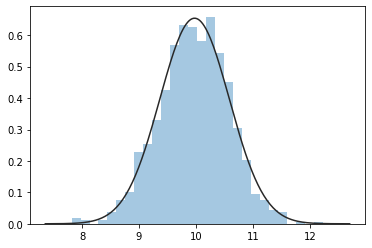

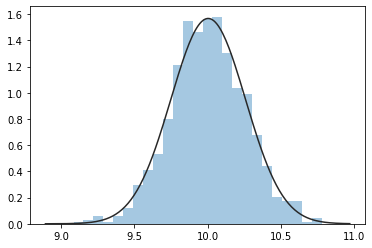

In [4]:
for n in arr:
    sample = np.zeros(1000)
    for i in range(1000):
        sample[i] = 2 * np.mean(uniform_rv.rvs(n))
    sns.distplot(sample, kde=False, fit=sts.norm)
    plt.show()

# 3) Построить гистограммы (смоделировав по 1000 реализаций) для $n(X_{(n)} − \theta)$, сравнить с экспоненциальной плотностью.

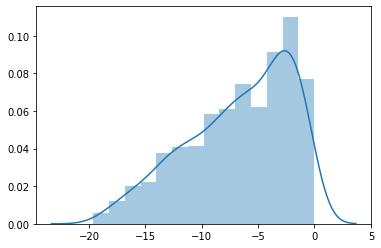

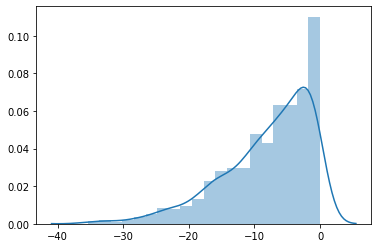

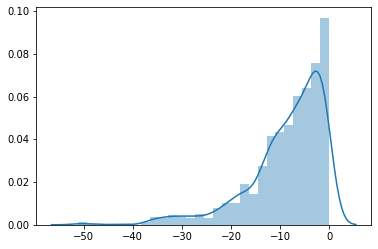

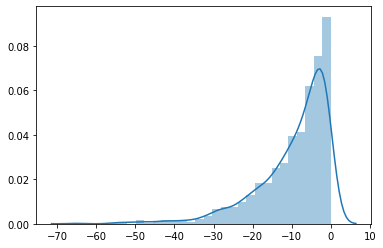

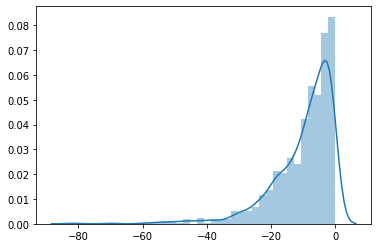

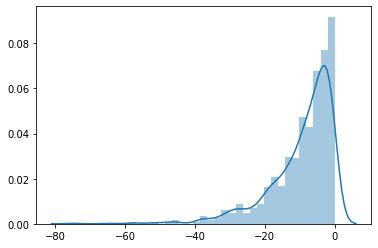

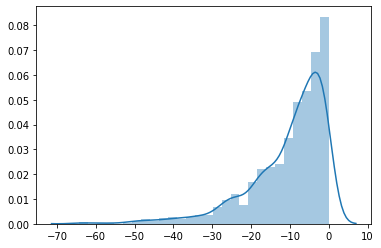

In [5]:
for n in arr:
    sample = np.zeros(1000)
    for i in range(1000):
        sample[i] = n * (np.max(uniform_rv.rvs(n)) - teta)
    sns.distplot(sample)
    plt.show()

## 4) Сравнить, какая из оценок $((n + 1)/n)X_{(n)}$ и  $2\overline X$ чаще оказывается ближе к θ при разных n, смоделировав для этого по 1000 реализаций (для каждого n).

Среднее абсолютное отклонение для оценки с максимумом =  0.04180630805549512
Среднее абсолютное отклонение для оценки с средним =  0.03373737572324487


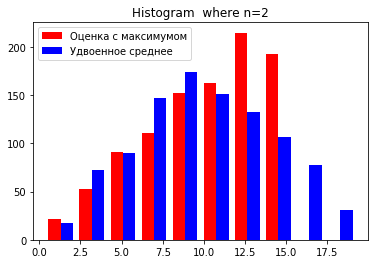

Среднее абсолютное отклонение для оценки с максимумом =  0.046672970330298824
Среднее абсолютное отклонение для оценки с средним =  0.04475324043172968


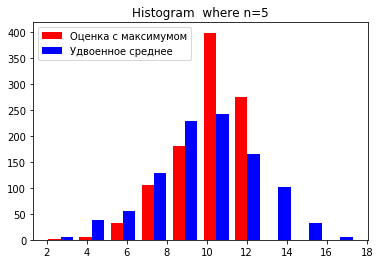

Среднее абсолютное отклонение для оценки с максимумом =  0.03996128356325812
Среднее абсолютное отклонение для оценки с средним =  0.04919530601459421


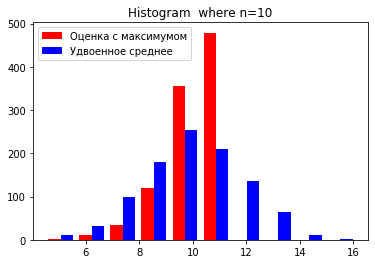

Среднее абсолютное отклонение для оценки с максимумом =  0.009395756927123244
Среднее абсолютное отклонение для оценки с средним =  0.09364089385658758


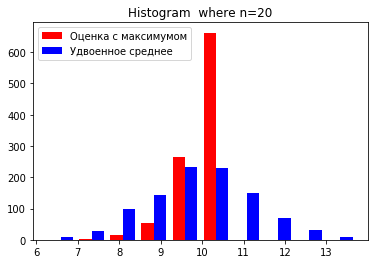

Среднее абсолютное отклонение для оценки с максимумом =  0.0024145692788870576
Среднее абсолютное отклонение для оценки с средним =  0.003471423249647998


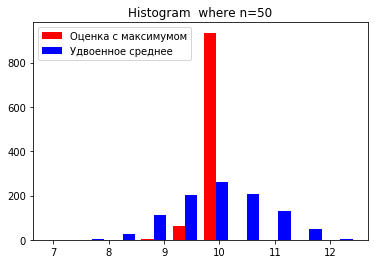

Среднее абсолютное отклонение для оценки с максимумом =  0.005880840798912601
Среднее абсолютное отклонение для оценки с средним =  0.016526208776539875


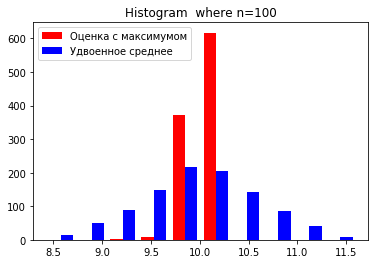

Среднее абсолютное отклонение для оценки с максимумом =  0.0005794304640911463
Среднее абсолютное отклонение для оценки с средним =  0.011030146279921382


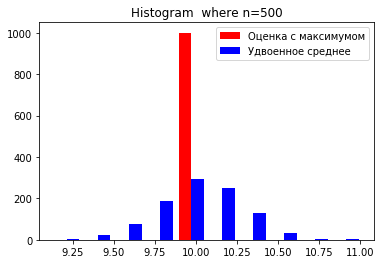

In [8]:
for n in arr:
    sample = np.zeros(1000)
    for i in range(1000):
        sample[i] = (n + 1) / n * (np.max(uniform_rv.rvs(n)))

    sample1 = np.zeros(1000)

    for i in range(1000):
        sample1[i] = 2 * np.mean(uniform_rv.rvs(n))
    plt.hist(
        [sample, sample1],
        color=["r", "b"],
        label=["Оценка с максимумом", "Удвоенное среднее"],
    )
    plt.title("Histogram  where n={}".format(n))
    plt.legend()
    print(
        "Среднее абсолютное отклонение для оценки с максимумом = ",
        abs(np.mean(sample) - teta),
    )
    print(
        "Среднее абсолютное отклонение для оценки с средним = ",
        abs(np.mean(sample1) - teta),
    )
    plt.show()

В среднем отклонение от истинного значения у оценки с максимумом меньше.

# 5) Изобразить гистограммы $\sqrt{n}(2 \overline X - \theta)$ и $\sqrt{n}(2 \overline X_\alpha - \theta)$ на одном графике, сравнить разбросы. Здесь $X_\alpha$ – усеченное среднее,

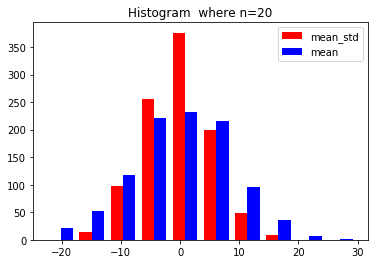

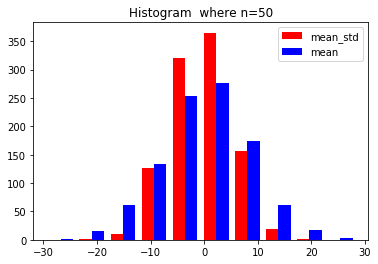

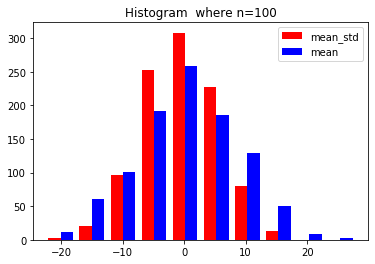

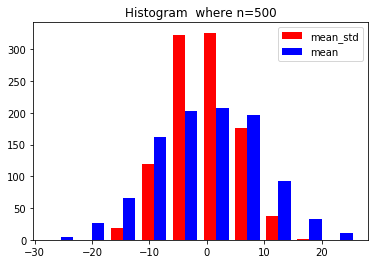

In [9]:
for n in [20, 50, 100, 500]:
    sample = np.zeros(1000)
    for i in range(1000):
        x = uniform_rv.rvs(n)
        sample[i] = (2 * np.mean(uniform_rv.rvs(n)) - teta) * n**0.5

    sample1 = np.zeros(1000)

    alp = 0.3
    k = round(alp * n)
    for i in range(1000):
        x = uniform_rv.rvs(n)
        x.sort()
        sample1[i] = np.mean(x[k : n - k])
    sample1 = (2 * sample1 - teta) * n**0.5
    plt.hist([sample, sample1], color=["r", "b"], label=["mean_std", "mean"])
    plt.title("Histogram  where n={}".format(n))
    plt.legend()
    plt.show()